In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# Each point is length, width and type (0 or 1)

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5, 1,   1],
        [1,   1,   0]]

mystery_flower = [4.5, 1]

In [5]:
# Network

#     0  flower type
#   /  \  w1, w2, b
#  0   0  length, width

In [6]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

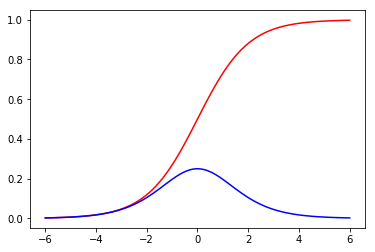

In [7]:
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

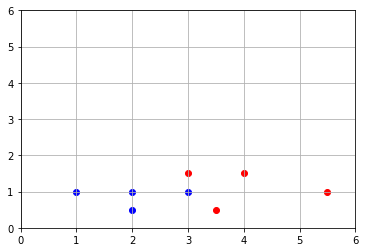

In [8]:
# Scatter data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c=color)

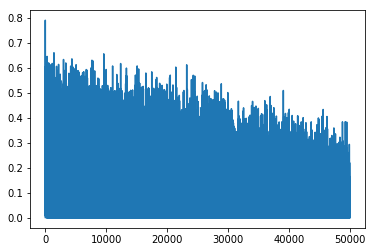

In [9]:
# Training loop

learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(1, 50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
    
    costs.append(cost)
    
    dcost_dpred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2
    dcost_db = dcost_dpred * dpred_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
plt.plot(costs)

In [10]:
# seeing model predictions

for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.818261054515055
[2, 1, 0]
pred: 0.0007560337285168076
[4, 1.5, 1]
pred: 0.9998166203756829
[3, 1, 0]
pred: 0.47813653254465954
[3.5, 0.5, 1]
pred: 0.8664524701849062
[2, 0.5, 0]
pred: 0.00015394086771975023
[5.5, 1, 1]
pred: 0.9999999786109512
[1, 1, 0]
pred: 6.248042415918979e-07


In [11]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
pred

0.9999740996504348

In [12]:
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < .5:
        print("Blue Flower")
    else:
        print("Red Flower")

In [13]:
which_flower(5.5, 1.5)

Red Flower


In [14]:
 which_flower(12, 2)

Red Flower
